In [16]:
#Data
S0 = 167.03 #Current Stock Price
r = 0.04635 #Risk-Free Rate
sigma = 0.196314699 #Annual Volatility
T = 0.082191781 #Time of Maturity (1 month) in years
K = 165 #Strike Price
n = 100 #Number of Steps

In [17]:
#Binomial Model and Black-Scholes Model
import math
from scipy.stats import norm
from scipy.special import comb
import matplotlib.pyplot as plt

def black_scholes_call(S0, r, sigma, T, K):
    d1 = (((r + ((sigma ** 2)/2)) * T) + math.log(S0/K)) / (sigma * math.sqrt(T))
    d2 = d1 - (sigma * math.sqrt(T))

    C0 = (S0 * norm.cdf(d1)) - ((K * norm.cdf(d2)) / (math.exp(r * T)))
    return C0


def binomial_call(S0, r, sigma, T, K, n):
    delta_t = T/n
    u = math.exp(sigma * math.sqrt(delta_t))
    d = 1/u
    p = (math.exp(r*delta_t) - d) / (u - d)

    summation = 0

    for i in range(0, n+1):
        x = comb(n, i) * (p ** i) * ((1 - p) ** (n - i)) * max((S0 * (u ** i) * (d ** (n - i))) - K, 0)
        summation += x

    C0 = summation / math.exp(r * T)

    return C0

def put_option_price(S0, r, T, K, C0):
    return C0 - S0 + (K / math.exp(r * T))

In [18]:
#Output Call and Put option value using Binomial Model (1-step)
print(f"Call option price using Binomial (one step): {binomial_call(S0, r, sigma, T, K, 1)}")
print(f"Put option price (Put-Call Parity): {put_option_price(S0, r, T, K, binomial_call(S0, r, sigma, T, K, 1))})")

Call option price using Binomial (one step): 6.058972597185046
Put option price (Put-Call Parity): 3.401586204976752)


In [19]:
#Output Call and Put option value using Black-Scholes Model
bs_call_price = black_scholes_call(S0, r, sigma, T, K)
print(f"Call option price using Black Scholes: {bs_call_price}")
print(f"Put option price (Put-Call Parity): {put_option_price(S0, r, T, K, bs_call_price)})")

Call option price using Black Scholes: 5.1986876373158
Put option price (Put-Call Parity): 2.541301245107519)


In [20]:
#Output Call and Put option value using Binomial Model (100-step)
print(f"Call option price using Binomial (100 steps): {binomial_call(S0, r, sigma, T, K, n)}")
print(f"Put option price (Put-Call Parity): {put_option_price(S0, r, T, K, binomial_call(S0, r, sigma, T, K, n))})")

Call option price using Binomial (100 steps): 5.195210795760616
Put option price (Put-Call Parity): 2.5378244035523494)


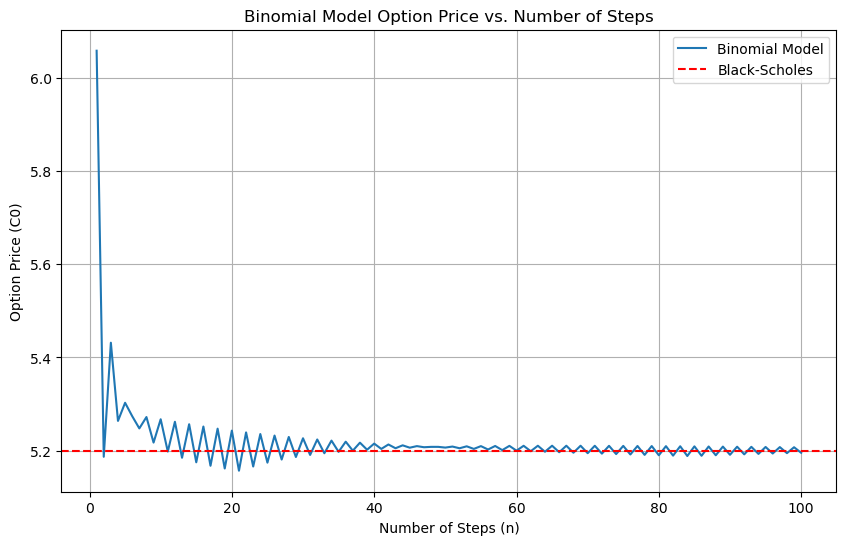

In [21]:
#Graph showing that Binomial model converges to Black-Scholes as n increases
call_values = [binomial_call(S0, r, sigma, T, K, i) for i in range(1, n+1)]
n_values = [i for i in range(1, n+1)]

plt.figure(figsize=(10, 6))
plt.plot(n_values, call_values, label='Binomial Model')
plt.axhline(y=bs_call_price, color='r', linestyle='--', label='Black-Scholes')
plt.xlabel('Number of Steps (n)')
plt.ylabel('Option Price (C0)')
plt.title('Binomial Model Option Price vs. Number of Steps')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
#Implied volatility (Using Newton-Raphson)
def newton_step(f, x0):
    def df(x):
        dx = 0.00001
        return (f(x + dx) - f(x)) / dx
    return x0 - (f(x0) / df(x0))

def newton_raphson(f, x0, tol):
    print(f"Initial Guess: {x0}")
    print(f"Value after Iterations")
    iter = 1
    while abs(newton_step(f, x0) - x0) > tol:
        x0 = newton_step(f, x0)
        print(f"Iteration: {iter}, Volatility:{x0}")
        iter += 1
    return x0

CallPriceVol = lambda vol : black_scholes_call(S0, r, vol, T, K) - C
C = bs_call_price
init = 0.1
tol = 10 ** (-8)
print(f"\nImplied Volatility: {newton_raphson(CallPriceVol, init, tol)}")


Initial Guess: 0.1
Value after Iterations
Iteration: 1, Volatility:0.20403553766945925
Iteration: 2, Volatility:0.19632599108712823
Iteration: 3, Volatility:0.19631469904922869

Implied Volatility: 0.19631469904922869
